## Mnist training

0 -> 5 only

### Import the data and filter the values greater than 5

In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

index_train_05 = np.where(y_train<6)
x_train = x_train[index_train_05]
y_train = y_train[index_train_05]

index_test_05 = np.where(y_test<6)
x_test = x_test[index_test_05]
y_test = y_test[index_test_05]

### Plot few mnist images

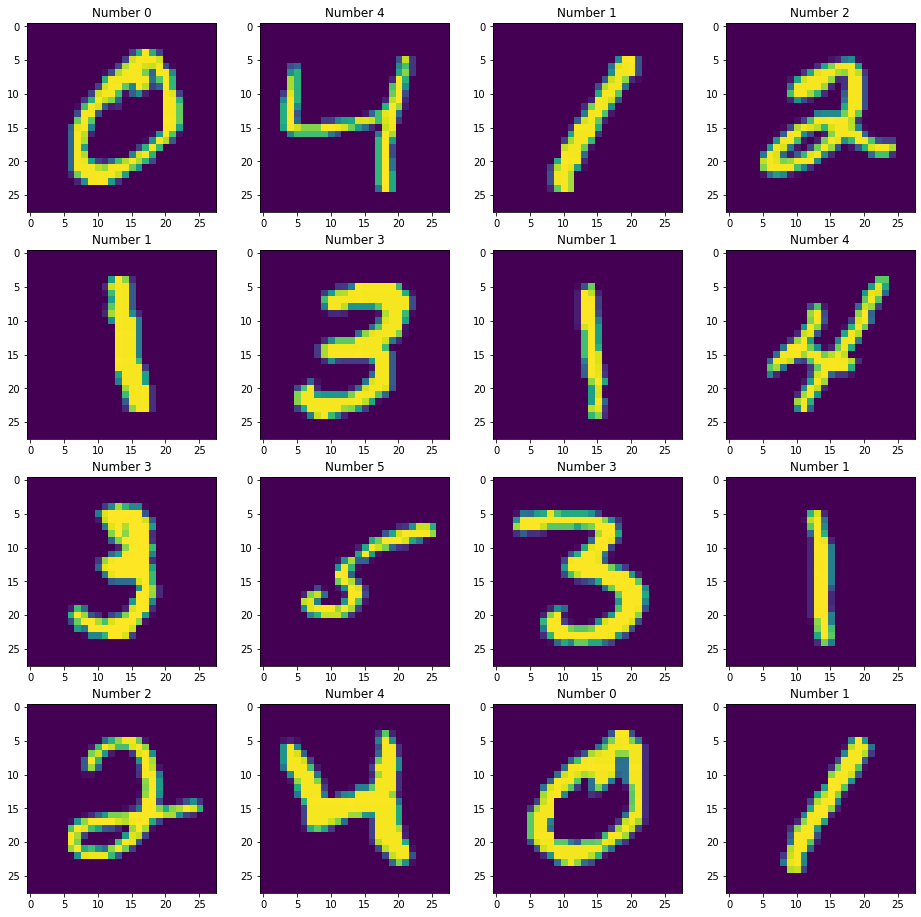

In [2]:
taille = 4
plt.subplots(nrows=taille,
             ncols=taille,
             figsize=(taille*taille,taille*taille)) 

for i in range(taille): 
    for j in range(taille): 
        indice = i*taille+j+1 
        
        plt.subplot(taille,taille,indice) 
        plt.imshow(x_train[indice]) 
        plt.title('Number '+str(y_train[indice])) 
plt.show()

### Data preprocessing

In [3]:
num_classes = 6

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(len(x_train), 1, img_rows, img_cols)
    x_test = x_test.reshape(len(x_test), 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("We split the data into : ")
print(len(x_train), "images dedicated to the training")
print(len(x_test), "images dedicated to the test part")

We split the data into : 
36017 images dedicated to the training
6031 images dedicated to the test part


### Model

In [4]:
model = Sequential()
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 36017 samples, validate on 6031 samples
Epoch 1/10
36017/36017 [==============================] - 13s 363us/sample - loss: 0.2676 - acc: 0.9107 - val_loss: 0.0308 - val_acc: 0.9891
Epoch 2/10
36017/36017 [==============================] - 13s 367us/sample - loss: 0.0601 - acc: 0.9811 - val_loss: 0.0182 - val_acc: 0.9935
Epoch 3/10
36017/36017 [==============================] - 13s 363us/sample - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0135 - val_acc: 0.9957
Epoch 4/10
36017/36017 [==============================] - 13s 362us/sample - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0109 - val_acc: 0.9959
Epoch 5/10
36017/36017 [==============================] - 13s 361us/sample - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0103 - val_acc: 0.9968
Epoch 6/10
36017/36017 [==============================] - 13s 364us/sample - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0115 - val_acc: 0.9964
Epoch 7/10
36017/36017 [==============================] - 13s 366us/sample - loss: 0.0211 - acc: 0.9935 -

Evaluation

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.006693628826411089
Test accuracy: 0.99767864


Save the model

In [8]:
model.save("mnist_05.h5")